## 웹 스크래핑

* 웹 사이트의 내용을 가져와 원하는 형태로 가공하는 것
* 어디에서 어느 정보를 가져올 것인지 정해야 함
* 웹 문서를 모두 가져온 후 원하는 부분만 추출

### 웹 사이트 접근 시 주의사항
* 웹 사이트의 이용규약을 확인하고 지킨다
* robots.tx와 robots 메타 태그의 접근 제한 사항을 지킨다.
* 제한이 없더라도 상대 서버에 부하가 가지 않을 정도의 속도로 접근
* rel="nofollow"가 설정되어 있으면 크롤러로 접근하지 않는다
* 크롤링을 거부하는 조치가 있으면 즉시 크롤링을 멈추고, 추출한 정보를 삭제

### 수집한 데이터를 다룰 때 중의사항
* 저작권에 문제가 있으면 개인적인 용도로만 사용
* 수집한 데이터를 기반으로 검색 서비스를 제공하는 경우, 웹 사이트와 API등의 사용 규약을 확인하고 문제 없을 시에만 제공
* 이용 규약이 따로 없을 때에도 상대방에게 확인한 뒤 데이터를 공개

### 정규표현식

* 일종의 문자를 표현하는 공식, 특정 규칙이 있는 문자열 집합을 추출할 때 자주 사용하는 기법, 일반적인 문자(a~z)와 메타문자라고 불리는 특수문자를 조합해서 특정문자열의 패턴을 작성

#### 문법
* 메타문자: 문자를 설명하기 위한 문자
* 문자의 구성을 설명하기 위해 원래의 의미가 아니라 다른 의미로 쓰이는 문자

In [ ]:
# before의 b를 검색
[abc]

In [ ]:
# -를 사용하여 알파벳 전체나 한글 전체 텍스트를 찾을 수 있다.
[A-Za-z] [가-힝] [0-9]

In [ ]:
# 반복 관련 메타문자 -, +, *, ?, {}
# 휴대전화번호 표현
[0-9][0-9][0-9] - [0-9][0-9][0-9][0-9] - [0-9][0-9][0-9][0-9]

In [ ]:
# +: 해당 글자가 1개 이상 나타나는 것을 뜻함
[0-9]+-[0-9]+-[0-9]+-

In [ ]:
# {m,n}: 출현 횟수를 지정, m은 시작, n은 끝, {1,}처럼 끝 값은 지정하지 않고 오픈 가능, 1번 이상은 출연해야 함
# 옛날번호는 강누데자리가 세글자도 존재하므오 3도 추가함
[0-9]{3} - [0-9]{3, 4} - [0-9]{4}

In [ ]:
# ?: 반드시 한 번만 반복
01[016789]?-[0-9]{3, 4}-[0-9]{4}

In [ ]:
# *: 0반데부터 무한대까지 반복가능
# + 는 {1,}와 같고, *는{0,}을 뜻함
# tomor*ow는 아애 모두를 포함, 0이 없어도 무방하다는 의미르 가지고 있기 때문
tomorrow
tomoow
tomorrrrow

* 그 외 문자

|문자|내용|
|----|----|
|[^abc]| 괄호 내부에 포함되지 않는 문자 중 하나와 매치 -> a,b,c를 제외한 문자 하나와 매치 |
|^|줄의 앞부분과 매치|
|$|줄의 끝부분과 매치|
|\\|'\\'로 구분된 패턴 중에 하나와 매치 |
|(n)|바로 앞의 패턴이 n번 나오는지 확인 -> yz(3)은 yzzz와 매치|
|(...)|()로 감싼 부분을 하나의 패턴으로 묶음 -> (xy) + xy, xyxy와 매치|
|\s|공백 문자와 일치|
|\S|글자 전부를 매치|
|\s\S|모든 문자 매치|

* HTML Parsing
* 웹 페이지의 HTML을 분석하여 필요한 URL을 추출하는 HTML파싱 작업이 필요
* 파싱은 특정 텍스트를 분석하여 그 데이터로부터 필요한 정보를 추출하는 과정

In [1]:
# 필요 패키지 불러오기
import urllib.request

# 정규 표현식 모듈
import re

In [2]:
# 삼성전자 주식정보 파싱
url = "https://finance.naver.com/item/main.nhn?code=005930"
html = urllib.request.urlopen(url)
html_contents = str(html.read().decode('ms949'))

In [3]:
html_contents

'\n\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\t<title>삼성전자 : 네이버 증권</title>\n\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta name="apple-mobile-web-app-title" content="네이버 증권" />\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="https://finance.naver.com/item/main.naver?code=005930"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="삼성전자 - 네이버 증권 : 네이버 증권"/>\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳"/>\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t    \n\t\t    \n\t\t\n    \n\n<meta property="og:type" content="article"/>\n<meta property="og:article:thumbnailUrl" con

In [4]:
# 첫번째 HTML 패턴
stock_results = re.findall('(\<dl class=\"blind\")([\s\S]+?)(\</dl\>)', html_contents)

# 튜플의 형태로 리턴
stock_results

[('<dl class="blind"',
  '>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 삼성전자</dd>\n\t        <dd>종목코드 005930 코스피</dd>\n\t        <dd>현재가 63,100 전일대비 하락 900 마이너스 1.41 퍼센트</dd>\n\t        <dd>전일가 64,000</dd>\n\t        <dd>시가 64,000</dd>\n\t        <dd>고가 64,000</dd>\n\t        <dd>상한가 83,200</dd>\n\t        <dd>저가 63,000</dd>\n\t        <dd>하한가 44,800</dd>\n\t        <dd>거래량 11,941,193</dd>\n\t        <dd>거래대금 755,268백만</dd>\n        ',
  '</dl>'),
 ('<dl class="blind"',
  '>\n                        <dt><strong>삼성전자</strong></dt>\n                        <dd>오늘의시세 63,100 포인트</dd>\n                        <dd>900 포인트 하락</dd>\n                        <dd>1.41% 마이너스</dd>\n                ',
  '</dl>')]

In [5]:
# 두 개의 튜플 값중 첫번째 패턴
samsung_stock = stock_results[0]
samsung_stock

('<dl class="blind"',
 '>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 삼성전자</dd>\n\t        <dd>종목코드 005930 코스피</dd>\n\t        <dd>현재가 63,100 전일대비 하락 900 마이너스 1.41 퍼센트</dd>\n\t        <dd>전일가 64,000</dd>\n\t        <dd>시가 64,000</dd>\n\t        <dd>고가 64,000</dd>\n\t        <dd>상한가 83,200</dd>\n\t        <dd>저가 63,000</dd>\n\t        <dd>하한가 44,800</dd>\n\t        <dd>거래량 11,941,193</dd>\n\t        <dd>거래대금 755,268백만</dd>\n        ',
 '</dl>')

In [6]:
# 세 개의 튜플 값중 두번째 패턴
samsung_index = samsung_stock[1]
samsung_index

'>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 삼성전자</dd>\n\t        <dd>종목코드 005930 코스피</dd>\n\t        <dd>현재가 63,100 전일대비 하락 900 마이너스 1.41 퍼센트</dd>\n\t        <dd>전일가 64,000</dd>\n\t        <dd>시가 64,000</dd>\n\t        <dd>고가 64,000</dd>\n\t        <dd>상한가 83,200</dd>\n\t        <dd>저가 63,000</dd>\n\t        <dd>하한가 44,800</dd>\n\t        <dd>거래량 11,941,193</dd>\n\t        <dd>거래대금 755,268백만</dd>\n        '

In [7]:
# 주식 정보만 추출
index_list = re.findall("(\<dd\>)([\s\S]+?)(\</dd\>)", samsung_index)
index_list

[('<dd>', '2023년 04월 03일 16시 11분 기준 장마감', '</dd>'),
 ('<dd>', '종목명 삼성전자', '</dd>'),
 ('<dd>', '종목코드 005930 코스피', '</dd>'),
 ('<dd>', '현재가 63,100 전일대비 하락 900 마이너스 1.41 퍼센트', '</dd>'),
 ('<dd>', '전일가 64,000', '</dd>'),
 ('<dd>', '시가 64,000', '</dd>'),
 ('<dd>', '고가 64,000', '</dd>'),
 ('<dd>', '상한가 83,200', '</dd>'),
 ('<dd>', '저가 63,000', '</dd>'),
 ('<dd>', '하한가 44,800', '</dd>'),
 ('<dd>', '거래량 11,941,193', '</dd>'),
 ('<dd>', '거래대금 755,268백만', '</dd>')]

In [8]:
# 세 개의 튜플 값중 두번째 값
for index in index_list:
    print(index[1])

2023년 04월 03일 16시 11분 기준 장마감
종목명 삼성전자
종목코드 005930 코스피
현재가 63,100 전일대비 하락 900 마이너스 1.41 퍼센트
전일가 64,000
시가 64,000
고가 64,000
상한가 83,200
저가 63,000
하한가 44,800
거래량 11,941,193
거래대금 755,268백만


In [9]:
# 현대자동차 주식정보 파싱
# 필요 패키지 불러오기
import urllib.request
# 정규표현식 모듈
import re
url = "https://finance.naver.com/item/main.nhn?code=005380"
html = urllib.request.urlopen(url)
html_contents = str(html.read().decode("ms949"))

In [10]:
html_contents

'\n\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\t<title>현대차 : 네이버 증권</title>\n\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta name="apple-mobile-web-app-title" content="네이버 증권" />\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="https://finance.naver.com/item/main.naver?code=005380"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="현대차 - 네이버 증권 : 네이버 증권"/>\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳"/>\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t    \n\t\t    \n\t\t\n    \n\n<meta property="og:type" content="article"/>\n<meta property="og:article:thumbnailUrl" conte

In [11]:
# 첫번째 HTML패턴
stock_results = re.findall("(\<dl class=\"blind\")([\s\S]+?)(\</dl\>)", html_contents)
stock_results

[('<dl class="blind"',
  '>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 현대차</dd>\n\t        <dd>종목코드 005380 코스피</dd>\n\t        <dd>현재가 183,600 전일대비 하락 900 마이너스 0.49 퍼센트</dd>\n\t        <dd>전일가 184,500</dd>\n\t        <dd>시가 184,600</dd>\n\t        <dd>고가 185,500</dd>\n\t        <dd>상한가 239,500</dd>\n\t        <dd>저가 182,300</dd>\n\t        <dd>하한가 129,200</dd>\n\t        <dd>거래량 529,877</dd>\n\t        <dd>거래대금 97,360백만</dd>\n        ',
  '</dl>'),
 ('<dl class="blind"',
  '>\n                        <dt><strong>현대차</strong></dt>\n                        <dd>오늘의시세 183,600 포인트</dd>\n                        <dd>900 포인트 하락</dd>\n                        <dd>0.49% 마이너스</dd>\n                ',
  '</dl>')]

In [12]:
# 두 개의 튜플 값 중 첫번째 패턴
hyundai_stock = stock_results[0]
hyundai_stock

('<dl class="blind"',
 '>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 현대차</dd>\n\t        <dd>종목코드 005380 코스피</dd>\n\t        <dd>현재가 183,600 전일대비 하락 900 마이너스 0.49 퍼센트</dd>\n\t        <dd>전일가 184,500</dd>\n\t        <dd>시가 184,600</dd>\n\t        <dd>고가 185,500</dd>\n\t        <dd>상한가 239,500</dd>\n\t        <dd>저가 182,300</dd>\n\t        <dd>하한가 129,200</dd>\n\t        <dd>거래량 529,877</dd>\n\t        <dd>거래대금 97,360백만</dd>\n        ',
 '</dl>')

In [13]:
# 세 개의 튜플 값 중 두번째 패턴
hyundai_index = hyundai_stock[1]
hyundai_index

'>\n\t        <dt>종목 시세 정보</dt>\n\t        <dd>2023년 04월 03일 16시 11분 기준 장마감</dd>\n\t        <dd>종목명 현대차</dd>\n\t        <dd>종목코드 005380 코스피</dd>\n\t        <dd>현재가 183,600 전일대비 하락 900 마이너스 0.49 퍼센트</dd>\n\t        <dd>전일가 184,500</dd>\n\t        <dd>시가 184,600</dd>\n\t        <dd>고가 185,500</dd>\n\t        <dd>상한가 239,500</dd>\n\t        <dd>저가 182,300</dd>\n\t        <dd>하한가 129,200</dd>\n\t        <dd>거래량 529,877</dd>\n\t        <dd>거래대금 97,360백만</dd>\n        '

In [14]:
# 주식 정보만 추출
index_list = re.findall("(\<dd\>)([\s\S]+?)(\/dd\>)", hyundai_index)
index_list

[('<dd>', '2023년 04월 03일 16시 11분 기준 장마감<', '/dd>'),
 ('<dd>', '종목명 현대차<', '/dd>'),
 ('<dd>', '종목코드 005380 코스피<', '/dd>'),
 ('<dd>', '현재가 183,600 전일대비 하락 900 마이너스 0.49 퍼센트<', '/dd>'),
 ('<dd>', '전일가 184,500<', '/dd>'),
 ('<dd>', '시가 184,600<', '/dd>'),
 ('<dd>', '고가 185,500<', '/dd>'),
 ('<dd>', '상한가 239,500<', '/dd>'),
 ('<dd>', '저가 182,300<', '/dd>'),
 ('<dd>', '하한가 129,200<', '/dd>'),
 ('<dd>', '거래량 529,877<', '/dd>'),
 ('<dd>', '거래대금 97,360백만<', '/dd>')]

In [15]:
# 세 개의 튜플 값중 두번째 값
for index in index_list:
    print(index[1])

2023년 04월 03일 16시 11분 기준 장마감<
종목명 현대차<
종목코드 005380 코스피<
현재가 183,600 전일대비 하락 900 마이너스 0.49 퍼센트<
전일가 184,500<
시가 184,600<
고가 185,500<
상한가 239,500<
저가 182,300<
하한가 129,200<
거래량 529,877<
거래대금 97,360백만<


## 웹 크롤링

* 웹 크롤러가 하는 작업 - 웹 크롤러는 조직적, 자동화 된 방법으로 웹을 탐색하는 프로그램, 웹 크롤링 혹은 스파이더링이라고도 불림
* 검색엔진과 같은 여러 사이트에서 사이트의 최신 상태를 유지하기 위해 웹 크롤링을 함
* 방문한 사이트의 모든 페이지의 복사본을 생성하는 데 사용되며, 생성된 페이지를 인덱싱 함
* 웹 크롤러는 봇이나 소프트웨어의 한 형태

* 웹 페이지에 있는 정보를 가지고 오는 것을 의미
* selenium 라이브러리의 webdriver를 활용해 웹 브라우저 조작
* BeautifulSoup라이브러리를 활용해 웹 페이지 상의 HTML데이터에서 필요한 정보를 가져 옴

In [10]:
# 필요  패키지 불러오기
!pip install selenium

In [16]:
from selenium import webdriver

In [17]:
# 크롬 드라이버 활용
# 크롬 드라이버 경로가 정확히 등록되어야 함
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

C:\Users\chunc\AppData\Local\Temp\ipykernel_16796\706859011.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" c
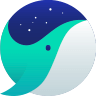
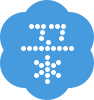

In [18]:
# URL접속
url = 'http://www.naver.com'
driver.get(url)

# 웹 페이지 HTML 다운로드
html = driver.page_source
html

### 크롤링 연습(멜론차트)

In [14]:
# 필요패키지 설치
!pip install beautifulsoup4

In [19]:
# 크롤링 연습(멜론)
from selenium import webdriver
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')
url = 'https://www.melon.com/chart/day/index.htm'
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_16796\2861460903.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [20]:
# BeautifulSoup패키지 모듈을 사용 멜론 일간 차트 파싱
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [21]:
# 일간차트 1~50위 항목을 불러오기
songs = soup.select('#lst50')
# print(len(songs))
print(songs[0])

<tr class="lst50" data-song-no="36318125" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Kitsch 곡 선택" type="checkbox" value="36318125"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11211297');" title="Kitsch">
<img alt="Kitsch - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/11/297/11211297_20230327114349_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongD

In [22]:
# 일간차트 1위곡의 제목 추출
title = soup.select('div.ellipsis.rank01 > span > a')[0].text
title

'Kitsch'

In [23]:
singer = soup.select('div.ellipsis.rank02 > a')[0].text
singer

'IVE (아이브)'

In [24]:
# for문을 사용하여 차트50위까지의 곡들의 제목과 가수 출력
for song in songs:
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '  |  ')

Kitsch  |  IVE (아이브)
Ditto  |  NewJeans
Hype boy  |  NewJeans
OMG  |  NewJeans
꽃  |  지수 (JISOO)
Nostalgia  |  우디 (Woody)
Teddy Bear  |  STAYC(스테이씨)
사건의 지평선  |  윤하 (YOUNHA)
I Don't Think That I Like Her  |  Charlie Puth
CHRISTIAN  |  Zior Park
파이팅 해야지 (Feat. 이영지)  |  부석순 (SEVENTEEN)
심(心)  |  DK(디셈버)
Attention  |  NewJeans
After LIKE  |  IVE (아이브)
사랑하기 싫어  |  지아
ANTIFRAGILE  |  LE SSERAFIM (르세라핌)
밤이 무서워요 (Lonely Night)  |  주주 시크릿
Love Me Like This  |  NMIXX
LOVE DIVE  |  IVE (아이브)
사랑인가 봐  |  멜로망스
벚꽃 엔딩  |  버스커 버스커
NIGHT DANCER  |  imase
Like Crazy  |  지민
나비무덤  |  포맨 (4MEN)
너를 보는게 지친 하루에  |  송하예
Dangerously  |  Charlie Puth
봄 사랑 벚꽃 말고  |  HIGH4 (하이포)
사랑은 늘 도망가  |  임영웅
결국엔 너에게 닿아서  |  WSG워너비 (가야G)
Candy  |  NCT DREAM
건물 사이에 피어난 장미 (Rose Blossom)  |  H1-KEY (하이키)
VIBE (feat. Jimin of BTS)  |  태양
너의 모든 순간  |  성시경
Nxde  |  (여자)아이들
Expectations  |  Anne-Marie
Say I Love You  |  우디 (Woody)
Monologue  |  테이
That's Hilarious  |  Charlie Puth
새삥 (Prod. ZICO) (Feat. 호미들)  |  지코 (ZICO)
해요 (2022)  | 

In [25]:
# 51~100위 차트 불러오기
songs = soup.select('#lst100')
print(songs[0])

<tr class="lst100" data-song-no="36266614" id="lst100" style="">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Young, Dumb, Stupid 곡 선택" type="checkbox" value="36266614"/></div></td>
<td><div class="wrap t_center"><span class="rank">51</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="18단계 상승">
<span class="bullet_icons rank_up"><span class="none">단계 상승</span></span>
<span class="up">18</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11201031');" title="expérgo">
<img alt="expérgo - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/01/031/11201031_20230320162256_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javas

In [26]:
for song in songs:
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '  |  ')

Young, Dumb, Stupid  |  NMIXX
그때 그 순간 그대로 (그그그)  |  WSG워너비 (가야G)
Unholy  |  Sam Smith
다정히 내 이름을 부르면  |  경서예지
Pink Venom  |  BLACKPINK
봄날  |  방탄소년단
되돌리다  |  먼데이 키즈 (Monday Kiz)
Set Me Free Pt.2  |  지민
FEARLESS  |  LE SSERAFIM (르세라핌)
우리들의 블루스  |  임영웅
오르트구름  |  윤하 (YOUNHA)
Dynamite  |  방탄소년단
NOT SORRY (Feat. pH-1) (Prod. by Slom)  |  이영지
ELEVEN  |  IVE (아이브)
Poppy (Korean Ver.)  |  STAYC(스테이씨)
사랑이라 믿었던 것들은 (Feat. 이수현)  |  BIG Naughty (서동현)
나의 X에게  |  경서
Rush Hour (Feat. j-hope of BTS)  |  Crush
나만, 봄  |  볼빨간사춘기
모든 날, 모든 순간 (Every day, Every Moment)  |  폴킴
그대를 알고  |  송하예
혼자가 아닌 나  |  정효빈
딱 10CM만  |  10CM
잘가요  |  주호
아모르 파티  |  이홍기 (FT아일랜드)
That That (prod. & feat. SUGA of BTS)  |  싸이 (PSY)
Sugar Rush Ride  |  투모로우바이투게더
Off My Face  |  Justin Bieber
그대라는 사치  |  임창정
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound)  |  정국
너와 함께  |  김민석 (멜로망스)
다시 만날 수 있을까  |  임영웅
Butter  |  방탄소년단
마지막 사랑  |  신예영
London Boy  |  임영웅
이제 나만 믿어요  |  임영웅
그댄 행복에 살텐데 (2022)  |  

In [27]:
# 1~100위 차트 모두 출력
songs = soup.select('.lst50, .lst100')
print(songs[0])

<tr class="lst50" data-song-no="36318125" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Kitsch 곡 선택" type="checkbox" value="36318125"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11211297');" title="Kitsch">
<img alt="Kitsch - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/11/297/11211297_20230327114349_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongD

In [28]:
# 추가적으로 앨범병까지 출력
album = soup.select('div.ellipsis.rank03 > a')[0].text
album

'Kitsch'

In [29]:
for song in songs:
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    album = song.select('div.ellipsis.rank03 > a')[0].text
    print(title, singer, album, sep = ' | ')

Kitsch | IVE (아이브) | Kitsch
Ditto | NewJeans | NewJeans 'OMG'
Hype boy | NewJeans | NewJeans 1st EP 'New Jeans'
OMG | NewJeans | NewJeans 'OMG'
꽃 | 지수 (JISOO) | ME
Nostalgia | 우디 (Woody) | Nostalgia
Teddy Bear | STAYC(스테이씨) | Teddy Bear
사건의 지평선 | 윤하 (YOUNHA) | YOUNHA 6th Album Repackage 'END THEORY : Final Edition'
I Don't Think That I Like Her | Charlie Puth | CHARLIE
CHRISTIAN | Zior Park | WHERE DOES SASQUATCH LIVE? PART 1
파이팅 해야지 (Feat. 이영지) | 부석순 (SEVENTEEN) | 부석순 1st Single Album 'SECOND WIND'
심(心) | DK(디셈버) | 심(心)
Attention | NewJeans | NewJeans 1st EP 'New Jeans'
After LIKE | IVE (아이브) | After LIKE
사랑하기 싫어 | 지아 | 사랑하기 싫어
ANTIFRAGILE | LE SSERAFIM (르세라핌) | ANTIFRAGILE
밤이 무서워요 (Lonely Night) | 주주 시크릿 | 밤이 무서워요 (Lonely Night)
Love Me Like This | NMIXX | expérgo
LOVE DIVE | IVE (아이브) | LOVE DIVE
사랑인가 봐 | 멜로망스 | 사랑인가 봐 (사내맞선 OST 스페셜 트랙)
벚꽃 엔딩 | 버스커 버스커 | 버스커 버스커 1집
NIGHT DANCER | imase | NIGHT DANCER
Like Crazy | 지민 | FACE
나비무덤 | 포맨 (4MEN) | 나비무덤
너를 보는게 지친 하루에 | 송하예 | 너를 보는게 지친 하루에


In [30]:
# selenium만을 활용한 크롤링 연습
# 모듈이 계속 업데이트가 되므로 함수명이 변경될 수도 있다
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')
url = 'https://www.melon.com/chart/day/index.htm'
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_16796\2337218689.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [31]:
songs = driver.find_elements(By.CSS_SELECTOR, '#lst50')
songs

[<selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="2c3eeb74-0680-408b-a603-47b430a9098c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="c3633e3c-ab05-400b-91f1-bdc3ebb3c164")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="3c9b62c9-f505-4049-b353-1ef2ebd8770c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="a57a8779-853f-4a7f-b974-5f03ae2ee7c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="fc769cf1-6198-41a9-a8ec-b8c16c613376")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="5bd0997e-cb76-4f26-b9be-f4cf206c105c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="60a7bcc0-6342-4274-98da-90

In [32]:
for song in songs:
    title = song.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = ' | ')

Kitsch | IVE (아이브)
Ditto | NewJeans
Hype boy | NewJeans
OMG | NewJeans
꽃 | 지수 (JISOO)
Nostalgia | 우디 (Woody)
Teddy Bear | STAYC(스테이씨)
사건의 지평선 | 윤하 (YOUNHA)
I Don't Think That I Like Her | Charlie Puth
CHRISTIAN | Zior Park
파이팅 해야지 (Feat. 이영지) | 부석순 (SEVENTEEN)
심(心) | DK(디셈버)
Attention | NewJeans
After LIKE | IVE (아이브)
사랑하기 싫어 | 지아
ANTIFRAGILE | LE SSERAFIM (르세라핌)
밤이 무서워요 (Lonely Night) | 주주 시크릿
Love Me Like This | NMIXX
LOVE DIVE | IVE (아이브)
사랑인가 봐 | 멜로망스
벚꽃 엔딩 | 버스커 버스커
NIGHT DANCER | imase
Like Crazy | 지민
나비무덤 | 포맨 (4MEN)
너를 보는게 지친 하루에 | 송하예
Dangerously | Charlie Puth
봄 사랑 벚꽃 말고 | HIGH4 (하이포)
사랑은 늘 도망가 | 임영웅
결국엔 너에게 닿아서 | WSG워너비 (가야G)
Candy | NCT DREAM
건물 사이에 피어난 장미 (Rose Blossom) | H1-KEY (하이키)
VIBE (feat. Jimin of BTS) | 태양
너의 모든 순간 | 성시경
Nxde | (여자)아이들
Expectations | Anne-Marie
Say I Love You | 우디 (Woody)
Monologue | 테이
That's Hilarious | Charlie Puth
새삥 (Prod. ZICO) (Feat. 호미들) | 지코 (ZICO)
해요 (2022) | #안녕
Cookie | NewJeans
우연히 봄 | 로꼬
취중고백 | 김민석 (멜로망스)
on the street (with J. Cole)

In [33]:
songs = driver.find_elements(By.CSS_SELECTOR, '#lst100')
songs

[<selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="3cfecfaf-e9b8-4b4d-9657-f215c1bd04a8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="fb233832-5ddf-4e35-99e3-2aaafe068b6e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="46feb487-b14b-48bc-a730-6e02d4d188fc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="96150aa5-1605-4e76-94f3-7836341752a8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="b91663df-e2cd-47ea-b585-720d4a280a22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="2b290ffe-762c-47b7-a844-086dec92210f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6b207750fc5bce5f03222220e09bdd98", element="0323682b-b08c-4a96-8da2-c0

In [34]:
for song in songs:
    title = song.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = ' | ')

Young, Dumb, Stupid | NMIXX
그때 그 순간 그대로 (그그그) | WSG워너비 (가야G)
Unholy | Sam Smith
다정히 내 이름을 부르면 | 경서예지
Pink Venom | BLACKPINK
봄날 | 방탄소년단
되돌리다 | 먼데이 키즈 (Monday Kiz)
Set Me Free Pt.2 | 지민
FEARLESS | LE SSERAFIM (르세라핌)
우리들의 블루스 | 임영웅
오르트구름 | 윤하 (YOUNHA)
Dynamite | 방탄소년단
NOT SORRY (Feat. pH-1) (Prod. by Slom) | 이영지
ELEVEN | IVE (아이브)
Poppy (Korean Ver.) | STAYC(스테이씨)
사랑이라 믿었던 것들은 (Feat. 이수현) | BIG Naughty (서동현)
나의 X에게 | 경서
Rush Hour (Feat. j-hope of BTS) | Crush
나만, 봄 | 볼빨간사춘기
모든 날, 모든 순간 (Every day, Every Moment) | 폴킴
그대를 알고 | 송하예
혼자가 아닌 나 | 정효빈
딱 10CM만 | 10CM
잘가요 | 주호
아모르 파티 | 이홍기 (FT아일랜드)
That That (prod. & feat. SUGA of BTS) | 싸이 (PSY)
Sugar Rush Ride | 투모로우바이투게더
Off My Face | Justin Bieber
그대라는 사치 | 임창정
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound) | 정국
너와 함께 | 김민석 (멜로망스)
다시 만날 수 있을까 | 임영웅
Butter | 방탄소년단
마지막 사랑 | 신예영
London Boy | 임영웅
이제 나만 믿어요 | 임영웅
그댄 행복에 살텐데 (2022) | 최유리
자격지심 (Feat. ZICO) | BE'O (비오)
LOVE me | BE'O (비오)
Polaroid | 임영웅
봄이 좋냐